In [258]:
#Basic Packages
import pandas as pd
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#html communication package
import requests as r

#import Beautiful Soup
import bs4

#import json library
import json

#Saving Model
import pickle
from joblib import dump, load

#missing 
import missingno as msno

# date
import datetime

In [259]:
%cd C:\\Users\\Matheus\\Documents\\projetos_github\\AI\\cartola

C:\Users\Matheus\Documents\projetos_github\AI\cartola


In [260]:
!dir

 O volume na unidade C não tem nome.
 O Número de Série do Volume é 0E60-8BBF

 Pasta de C:\Users\Matheus\Documents\projetos_github\AI\cartola

03/08/2021  11:37 PM    <DIR>          .
03/08/2021  11:37 PM    <DIR>          ..
03/06/2021  06:01 PM    <DIR>          .ipynb_checkpoints
02/25/2021  12:02 AM             4,230 baixados_icone.png
03/08/2021  11:31 PM           219,230 Cartola.ipynb
02/24/2021  10:38 PM            72,189 cartola.jpg
02/24/2021  11:48 PM           311,916 cartola3.jpg
02/24/2021  11:47 PM             5,830 cartola_2.jpg
02/25/2021  09:05 AM           629,493 cartola_FC.pbix
02/21/2021  06:59 PM         8,508,037 Cartola_historic_data.txt
03/08/2021  11:37 PM           108,858 Cartola_Prediction.ipynb
02/25/2021  01:32 AM    <DIR>          data
02/25/2021  07:56 AM       267,769,274 model
02/25/2021  07:56 AM       267,777,521 model.joblib
02/25/2021  08:56 AM            97,958 rodada_38_pred.xlsx
02/25/2021  08:54 AM           102,679 rodada_atual.xlsx
02/22/2

<h1 style="color:gray;"> Get Current Round Data </h1>

#Current Round API

https://api.cartolafc.globo.com/rodadas
https://api.cartolafc.globo.com/clubes
https://api.cartolafc.globo.com/partidas
https://api.cartolafc.globo.com/atletas/mercado

In [261]:
round =  r.get('https://api.cartolafc.globo.com/atletas/mercado')

In [262]:
type(round.content)

bytes

In [263]:
round_json = json.loads(round.content)

In [264]:
round_json.keys()

dict_keys(['atletas', 'clubes', 'posicoes', 'status'])

In [265]:
atletas_df = pd.json_normalize(round_json['atletas'])
atletas_df.head(n=5)

,nome,slug,apelido,foto,atleta_id,rodada_id,clube_id,posicao_id,status_id,pontos_num,...,scout.FF,scout.FS,scout.FT,scout.G,scout.I,scout.PP,scout.CA,scout.DS,scout.CV,scout.GC
0,Marcelo Ribeiro Cabo,marcelo-cabo,Marcelo Cabo,https://s.glbimg.com/es/sde/f/2020/11/10/d6819...,37333,38,373,6,7,3.87,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Júlio César de Souza Santos,julio-cesar,Júlio César,https://s.glbimg.com/es/sde/f/2020/07/28/d011e...,38133,38,280,1,6,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Augusto Sérgio Ferreira,guto-ferreira,Guto Ferreira,https://s.glbimg.com/es/sde/f/2020/07/19/37fe3...,37245,38,354,6,7,2.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,João Alves de Assis Silva,jo,Jô,https://s.glbimg.com/es/sde/f/2020/07/21/71eb3...,38138,38,264,5,6,-0.50,...,6.0,22.0,1.0,5.0,9.0,1.0,NaN,NaN,NaN,NaN
4,Rafael Martiniano de Miranda Moura,rafael-moura,Rafael Moura,https://s.glbimg.com/es/sde/f/2020/08/26/6c384...,37655,38,290,5,7,3.50,...,28.0,28.0,NaN,9.0,20.0,NaN,8.0,13.0,NaN,NaN


In [266]:
escudos_df =pd.DataFrame(pd.json_normalize((pd.DataFrame(round_json['clubes']).transpose()['escudos'])))
escudos_df.head(n=5)

,60x60,45x45,30x30
0,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...
1,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...
2,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...
3,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...
4,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...


In [267]:
clubes_df =pd.DataFrame(round_json['clubes']).transpose().reset_index()
clubes_df= pd.merge(clubes_df,escudos_df, left_index= True,right_index=True)
clubes_df.head(n=5)

,index,id,nome,abreviacao,escudos,nome_fantasia,60x60,45x45,30x30
0,262,262,Flamengo,FLA,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Flamengo,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...
1,263,263,Botafogo,BOT,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Botafogo,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...
2,264,264,Corinthians,COR,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Corinthians,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...
3,265,265,Bahia,BAH,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Bahia,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...
4,266,266,Fluminense,FLU,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Fluminense,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...


In [268]:
posicoes_df =pd.DataFrame(round_json['posicoes']).transpose()
posicoes_df.head(n=5)

,id,nome,abreviacao
1,1,Goleiro,gol
2,2,Lateral,lat
3,3,Zagueiro,zag
4,4,Meia,mei
5,5,Atacante,ata


In [269]:
status_df = pd.DataFrame(round_json['status']).transpose()
status_df.head(n=5)

,id,nome
2,2,Dúvida
3,3,Suspenso
5,5,Contundido
6,6,Nulo
7,7,Provável


In [270]:
atletas_df =atletas_df.merge(clubes_df, left_on='clube_id', right_on='id')
atletas_df = atletas_df.merge(posicoes_df,left_on ='posicao_id', right_on = 'id' )

In [271]:
atletas_df.columns

Index(['nome_x', 'slug', 'apelido', 'foto', 'atleta_id', 'rodada_id',
       'clube_id', 'posicao_id', 'status_id', 'pontos_num', 'preco_num',
       'variacao_num', 'media_num', 'jogos_num', 'scout.DD', 'scout.DP',
       'scout.GS', 'scout.PI', 'scout.SG', 'scout.A', 'scout.FC', 'scout.FD',
       'scout.FF', 'scout.FS', 'scout.FT', 'scout.G', 'scout.I', 'scout.PP',
       'scout.CA', 'scout.DS', 'scout.CV', 'scout.GC', 'index', 'id_x',
       'nome_y', 'abreviacao_x', 'escudos', 'nome_fantasia', '60x60', '45x45',
       '30x30', 'id_y', 'nome', 'abreviacao_y'],
      dtype='object')

In [272]:
atletas_df.head(2)

,nome_x,slug,apelido,foto,atleta_id,rodada_id,clube_id,posicao_id,status_id,pontos_num,...,nome_y,abreviacao_x,escudos,nome_fantasia,60x60,45x45,30x30,id_y,nome,abreviacao_y
0,Marcelo Ribeiro Cabo,marcelo-cabo,Marcelo Cabo,https://s.glbimg.com/es/sde/f/2020/11/10/d6819...,37333,38,373,6,7,3.87,...,Atlético-GO,ACG,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Atlético-GO,https://s.glbimg.com/es/sde/f/organizacoes/202...,https://s.glbimg.com/es/sde/f/organizacoes/202...,https://s.glbimg.com/es/sde/f/organizacoes/202...,6,Técnico,tec
1,Maurício Nogueira Barbieri,mauricio-barbieri,Maurício Barbieri,https://s.glbimg.com/es/sde/f/2020/09/04/e02bb...,82792,38,280,6,7,4.17,...,Bragantino,BGT,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Bragantino,https://s.glbimg.com/es/sde/f/organizacoes/202...,https://s.glbimg.com/es/sde/f/organizacoes/202...,https://s.glbimg.com/es/sde/f/organizacoes/202...,6,Técnico,tec


In [273]:
atletas_df.columns=['nome_atleta', 'slug', 'apelido', 'foto', 'atleta_id', 'rodada',
       'clube_id', 'posicao_id', 'status_id', 'atletas.pontos_num', 'atletas.preco_num',
       'atletas.variacao_num', 'atletas.media_num', 'jogos_num', 'DD', 'DP',
       'GS', 'PI', 'SG', 'A', 'FC', 'FD',
       'FF', 'FS', 'FT', 'G', 'I', 'PP',
       'CA', 'DS', 'CV', 'GC', 'index', 'id_x',
       'nome_y', 'abreviacao_x', 'escudos', 'nome_fantasia', '60x60', '45x45',
       '30x30', 'id_y', 'nome', 'atletas.posicao_id']

In [274]:
atletas_df.head(n=5)

,nome_atleta,slug,apelido,foto,atleta_id,rodada,clube_id,posicao_id,status_id,atletas.pontos_num,...,nome_y,abreviacao_x,escudos,nome_fantasia,60x60,45x45,30x30,id_y,nome,atletas.posicao_id
0,Marcelo Ribeiro Cabo,marcelo-cabo,Marcelo Cabo,https://s.glbimg.com/es/sde/f/2020/11/10/d6819...,37333,38,373,6,7,3.87,...,Atlético-GO,ACG,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Atlético-GO,https://s.glbimg.com/es/sde/f/organizacoes/202...,https://s.glbimg.com/es/sde/f/organizacoes/202...,https://s.glbimg.com/es/sde/f/organizacoes/202...,6,Técnico,tec
1,Maurício Nogueira Barbieri,mauricio-barbieri,Maurício Barbieri,https://s.glbimg.com/es/sde/f/2020/09/04/e02bb...,82792,38,280,6,7,4.17,...,Bragantino,BGT,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Bragantino,https://s.glbimg.com/es/sde/f/organizacoes/202...,https://s.glbimg.com/es/sde/f/organizacoes/202...,https://s.glbimg.com/es/sde/f/organizacoes/202...,6,Técnico,tec
2,Augusto Sérgio Ferreira,guto-ferreira,Guto Ferreira,https://s.glbimg.com/es/sde/f/2020/07/19/37fe3...,37245,38,354,6,7,2.05,...,Ceará,CEA,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Ceará,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...,6,Técnico,tec
3,Vagner Carmo Mancini,vagner-mancini,Vagner Mancini,https://s.glbimg.com/es/sde/f/2020/10/17/872ed...,39850,38,264,6,7,5.11,...,Corinthians,COR,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Corinthians,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...,6,Técnico,tec
4,Glauber Ramos da Silva,glauber-ramos,Glauber Ramos,https://s.glbimg.com/es/sde/f/2020/08/21/ef5db...,109638,38,290,6,7,3.94,...,Goiás,GOI,{'60x60': 'https://s.glbimg.com/es/sde/f/organ...,Goiás,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...,https://s.glbimg.com/es/sde/f/organizacoes/201...,6,Técnico,tec


In [275]:
atletas_df_pred =atletas_df.copy()

In [276]:
atletas_df_pred.drop(columns=['id_y', 'nome','nome_y'],inplace=True)

In [277]:
atletas_df_pred = pd.get_dummies(atletas_df,columns = ["atletas.posicao_id"],drop_first=True) 

In [278]:
atletas_df_pred.columns

Index(['nome_atleta', 'slug', 'apelido', 'foto', 'atleta_id', 'rodada',
       'clube_id', 'posicao_id', 'status_id', 'atletas.pontos_num',
       'atletas.preco_num', 'atletas.variacao_num', 'atletas.media_num',
       'jogos_num', 'DD', 'DP', 'GS', 'PI', 'SG', 'A', 'FC', 'FD', 'FF', 'FS',
       'FT', 'G', 'I', 'PP', 'CA', 'DS', 'CV', 'GC', 'index', 'id_x', 'nome_y',
       'abreviacao_x', 'escudos', 'nome_fantasia', '60x60', '45x45', '30x30',
       'id_y', 'nome', 'atletas.posicao_id_gol', 'atletas.posicao_id_lat',
       'atletas.posicao_id_mei', 'atletas.posicao_id_tec',
       'atletas.posicao_id_zag'],
      dtype='object')

In [279]:
atletas_df_pred['ano']= datetime.datetime.now().year

In [280]:
atletas_df_pred = atletas_df_pred[['atletas.pontos_num', 'atletas.preco_num', 'atletas.variacao_num',
       'atletas.media_num', 'FC', 'FD', 'FF', 'FS', 'G', 'I', 'CA', 'A', 'SG',
       'DD', 'FT', 'GS', 'CV', 'GC', 'ano', 'rodada', 'PP', 'DP', 'PI', 'DS','atletas.posicao_id_gol',
       'atletas.posicao_id_lat', 'atletas.posicao_id_mei',
       'atletas.posicao_id_tec', 'atletas.posicao_id_zag','atleta_id']]

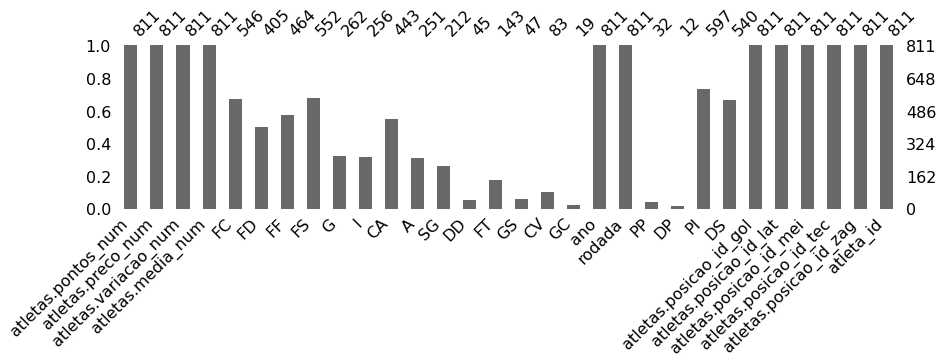

In [281]:
msno.bar(atletas_df_pred, figsize=(14, 3))

In [282]:
atletas_df_pred =atletas_df_pred.fillna(value=0)

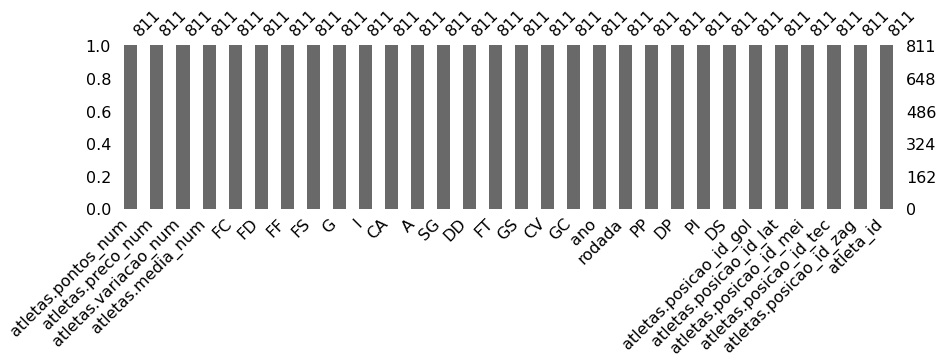

In [283]:
msno.bar(atletas_df_pred,figsize=(14,3))

<h1 style="color:gray;"> Import Model and generate a Prediction </h1>

In [284]:
model= load('model.joblib') 

In [285]:
proxima_rodada_prep = atletas_df_pred.drop(columns = ['atleta_id'])

In [286]:
proxima_rodada_pred = model.predict(proxima_rodada_prep)

In [287]:
atletas_df['pred'] =proxima_rodada_pred

In [288]:
atletas_df.to_excel('rodada_pred.xlsx')